<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/2class_test_datanew_nsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [6]:
df = pd.read_csv (r'/content/drive/My Drive/data_nsc - ใช้อันนี้เทรนV2.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
0,1,1-s2.0-S2352152X22008957-main,Activated carbons obtained by environmentally ...,Journal of Energy Storage,/content/drive/My Drive/modelnsc/1-s2.0-S23521...,original,401-3200,923.0,10
1,2,1-s2.0-S2352152X22008957-main,Activated carbons obtained by environmentally ...,Journal of Energy Storage,/content/drive/My Drive/modelnsc/1-s2.0-S23521...,original,401-3200,1223.0,10
2,3,1-s2.0-S2352152X22008957-main,Activated carbons obtained by environmentally ...,Journal of Energy Storage,/content/drive/My Drive/modelnsc/1-s2.0-S23521...,original,401-3200,1056.0,10
3,4,1-s2.0-S2352152X22008957-main,Activated carbons obtained by environmentally ...,Journal of Energy Storage,/content/drive/My Drive/modelnsc/1-s2.0-S23521...,original,401-3200,856.0,10
4,5,1-s2.0-S2352152X22008957-main,Activated carbons obtained by environmentally ...,Journal of Energy Storage,/content/drive/My Drive/modelnsc/1-s2.0-S23521...,original,401-3200,1263.0,10
...,...,...,...,...,...,...,...,...,...
1321,1322,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/modelnsc/1-s2.0-S09266...,original,0-400,11.0,10
1322,1323,new-sb,Biosugarcane-based carbon support for high- pe...,iScience,/content/drive/My Drive/modelnsc/new-sb/18.png,original,0-400,53.7,10
1323,1324,new-sb,Biosugarcane-based carbon support for high- pe...,iScience,/content/drive/My Drive/modelnsc/new-sb/19.png,original,0-400,34.3,10
1324,1325,new-sb,Biosugarcane-based carbon support for high- pe...,iScience,/content/drive/My Drive/modelnsc/new-sb/20.png,original,0-400,27.2,10


In [7]:
import sys
sys.path.append('/content/drive/My Drive/new/nsc4.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [8]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/new/nsc4.h5')
height = width = model.input_shape[1]

In [9]:
base_dir = '/content/drive/My Drive/modeldatansc'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

In [10]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40,# หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, # Randomly zoom image
      horizontal_flip=True, 
      #โดย Default เมื่อมีการเลื่อนภาพ บิดภาพ หมุนภาพ จะเกิดพื้นที่ว่างที่มุม 
      #ซึ่งจะมีการเติมภาพให้เต็มโดยใช้เทคนิคแบบ Nearest neighbor ซึ่งเป็นการดึงสีบริเวณใหล้าเคียงมาระบายให้เต็ม แต่เราก็ยังสามารถกำหนดวิธีการ Fill ภาพด้วยเทคนิคอื่นได้จาก Parameter fill_mode
      fill_mode='nearest')
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory #ไดเรกเป้าหมาย
        train_dir,
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( #การดึงภาพจาก Directory มาเข้าโมเดล 
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
     

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1279 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
{0: '0-400', 1: '401-3200'}


In [11]:
test = df[df['No'].between(1310,1326)] 
test

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico)
1309,1310,Good2,Effect of Ball Milling on the Electrochemical ...,Batteries,/content/drive/My Drive/modelnsc/Good2/1.png,original,401-3200,3198.00,10
1310,1311,Good2,Effect of Ball Milling on the Electrochemical ...,Batteries,/content/drive/My Drive/modelnsc/Good2/2.png,original,401-3200,3073.00,10
1311,1312,Good2,Effect of Ball Milling on the Electrochemical ...,Batteries,/content/drive/My Drive/modelnsc/Good2/3.png,original,401-3200,3041.00,10
1312,1313,Good2,Effect of Ball Milling on the Electrochemical ...,Batteries,/content/drive/My Drive/modelnsc/Good2/4.png,original,401-3200,2755.00,10
1313,1314,Good2,Effect of Ball Milling on the Electrochemical ...,Batteries,/content/drive/My Drive/modelnsc/Good2/5.png,original,401-3200,2448.00,10
1314,1315,1-s2.0-S0925963522003478-main,"One-step production of N, S co-doped honeycomb...",Diamond & Related Materials,/content/drive/My Drive/modelnsc/1-s2.0-S09259...,original,401-3200,818.00,10
1315,1316,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/modelnsc/1-s2.0-S09266...,original,0-400,0.25,10
1316,1317,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/modelnsc/1-s2.0-S09266...,original,0-400,35.00,10
1317,1318,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/modelnsc/1-s2.0-S09266...,original,401-3200,583.00,10
1318,1319,1-s2.0-S0926669022000292-main,Low-cost activated carbon preparation from Cor...,Industrial Crops & Products,/content/drive/My Drive/modelnsc/1-s2.0-S09266...,original,401-3200,820.00,10


In [12]:

act = test['Class'].tolist()
path = test['path_Picture'].tolist()

In [13]:

from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน 
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
import numpy as np

In [15]:

no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 2s 2s/step


'401-3200'

In [16]:
predict_image(path[1]) 

1/1 [==============================] - 0s 65ms/step


array([0.86571985, 0.13428012], dtype=float32)

In [17]:
np.argmax(predict_image(path[1]))

1/1 [==============================] - 0s 60ms/step


0

In [18]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

1/1 [==============================] - 0s 62ms/step


In [19]:
result

0

In [20]:
prob_list[0]

0.5509991

In [21]:
pred_list[0]

'401-3200'

In [22]:
pred = np.array(pred_list)
act = np.array(act)

In [23]:
act

array(['401-3200', '401-3200', '401-3200', '401-3200', '401-3200',
       '401-3200', '0-400', '0-400', '401-3200', '401-3200', '401-3200',
       '0-400', '0-400', '0-400', '0-400', '0-400', '0-400'], dtype='<U8')

In [24]:
pred

array(['401-3200', '0-400', '0-400', '401-3200', '401-3200', '401-3200',
       '0-400', '0-400', '401-3200', '401-3200', '0-400', '401-3200',
       '0-400', '0-400', '0-400', '0-400', '0-400'], dtype='<U8')

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 76.47058823529412%
              precision    recall  f1-score   support

       0-400       0.70      0.88      0.78         8
    401-3200       0.86      0.67      0.75         9

    accuracy                           0.76        17
   macro avg       0.78      0.77      0.76        17
weighted avg       0.78      0.76      0.76        17



Text(0.5, 21.249999999999993, 'Predicted label')

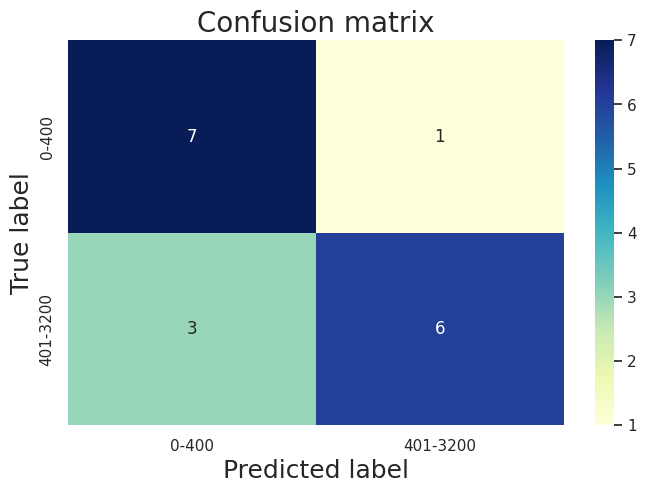

In [26]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)